In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path("C:\\Users\\rajatsood\\Desktop\\plantdiesease\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train")

In [3]:
plant = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(128)
)

dls = plant.dataloaders(path)

E:\anaconda\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


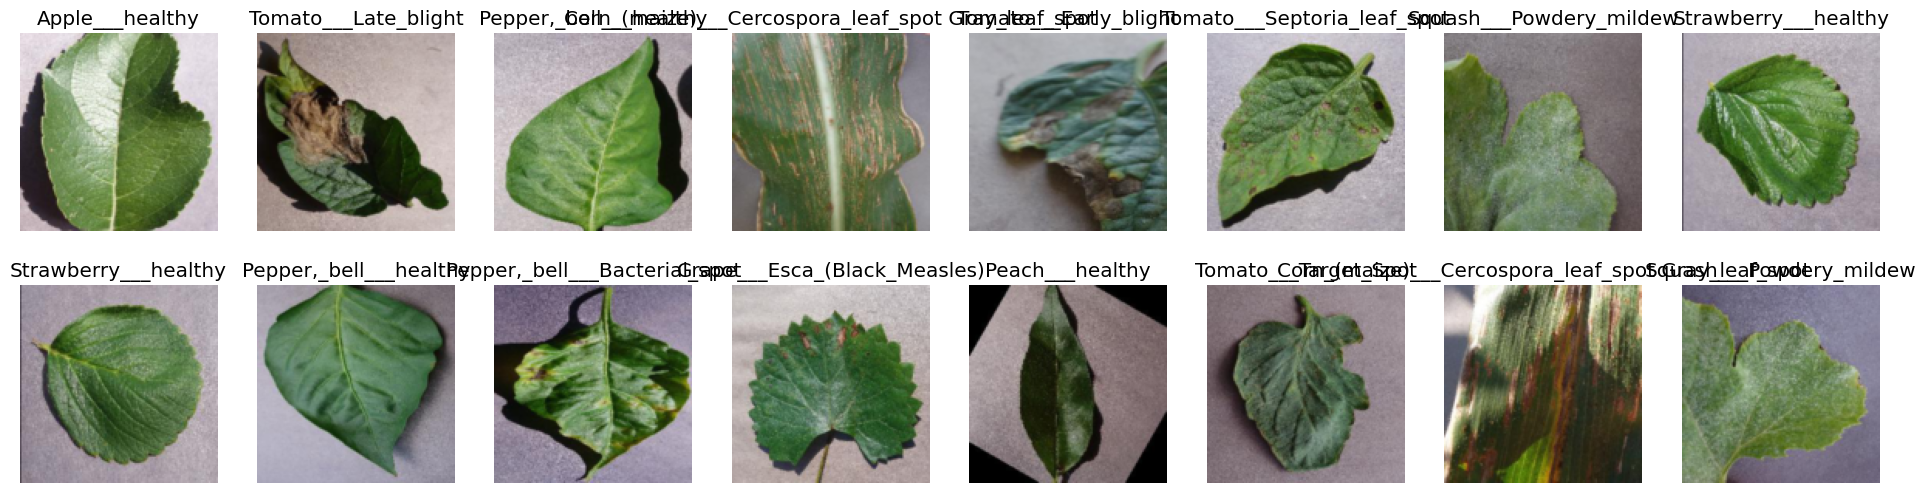

In [4]:
dls.valid.show_batch(max_n=16, nrows=2)

In [5]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(3)

E:\anaconda\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.434623,0.252914,0.917348,1:05:38


epoch,train_loss,valid_loss,accuracy,time
0,0.083304,0.047636,0.983711,1:24:06
1,0.029540,0.024327,0.991607,1:24:37
2,0.011594,0.020481,0.993598,1:23:23


E:\anaconda\Lib\site-packages\fastai\interpret.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


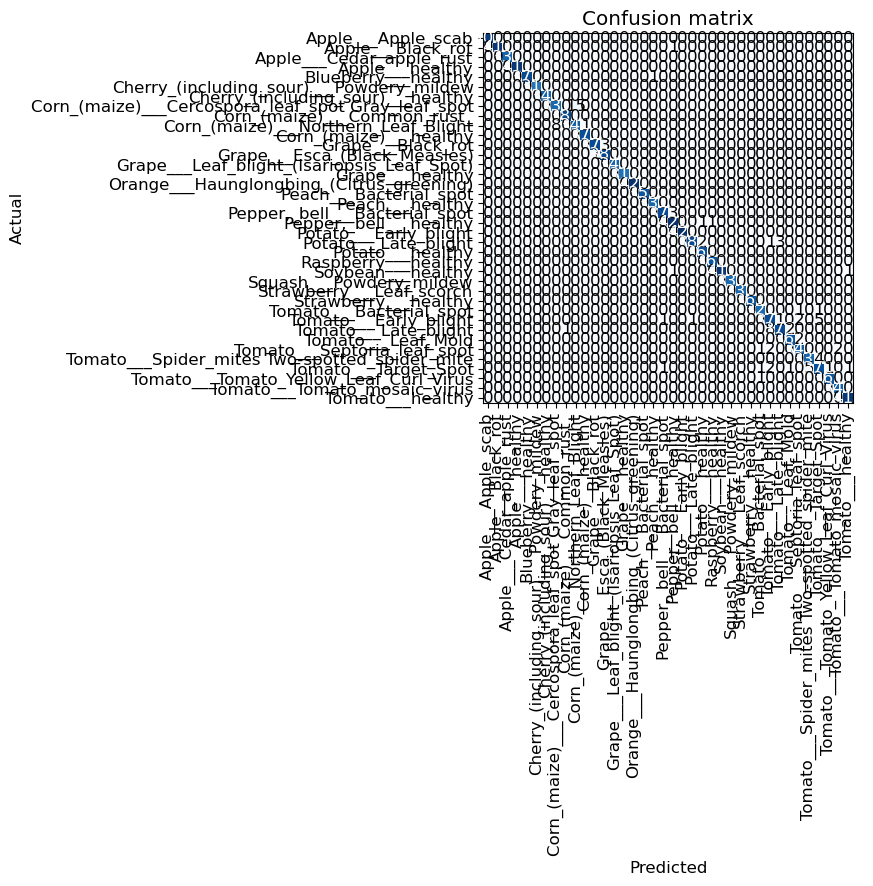

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
learn.export()

In [8]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner(path/'export.pkl')

Accuracy

In [10]:
print(learn.validate())

E:\anaconda\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


[0.020480502396821976, 0.9935984015464783]


Predictions

In [11]:
a = learn_inf.predict("C:\\Users\\\\rajatsood\\Desktop\\plantdiesease\\test\\test\\AppleCedarRust2.JPG")[0]
print(a)

Apple___Cedar_apple_rust


In [12]:
a = learn_inf.predict("C:\\Users\\rajatsood\\Desktop\\plantdiesease\\test\\test\\TomatoEarlyBlight1.JPG")[0]
print(a)

Tomato___Early_blight


In [14]:
a = learn_inf.predict("C:\\Users\\rajatsood\\Desktop\\plantdiesease\\test\\test\\TomatoYellowCurlVirus6.JPG")[0]
print(a)

Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [15]:
a = learn_inf.predict("C:\\Users\\rajatsood\\Desktop\\plantdiesease\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Corn_(maize)___Common_rust_\\RS_Rust 1666.JPG")[0]
print(a)

Corn_(maize)___Common_rust_
